In [0]:
from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)



Mounted at /content/gdrive


In [0]:
import numpy as np, math,re,random
import scipy.spatial
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
...
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
#from pomegranate import *

import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
import re
from sklearn.neighbors import KNeighborsClassifier as kn

In [0]:
test_path1='/content/gdrive/My Drive/datasets/prnnass1/P2a_test_data_20D.txt'
train_path1='/content/gdrive/My Drive/datasets/prnnass1/P2a_train_data_20D.txt'
test_path2='/content/gdrive/My Drive/datasets/prnnass1/P2b_test_data_20D.txt'
train_path2='/content/gdrive/My Drive/datasets/prnnass1/P2b_train_data_20D.txt'
test_path3='/content/gdrive/My Drive/datasets/prnnass1/P2c_test_data_20D.txt'
train_path3='/content/gdrive/My Drive/datasets/prnnass1/P2c_train_data_20D.txt'


In [0]:
def find_accuracy(X,Y):
  x=0
  for i in range (len (X)):
    if(X[i]!=Y[i]):
      x+=1
 # print(X)
  #print(Y)
  return (1-x/len(X) )   

In [0]:
def taking_data(c):
  if c==1:
    tp=train_path1
    testp=test_path1
  elif c==3:
    tp=train_path3
    testp=test_path3
  else:
    tp=train_path2
    testp=test_path2
  with open(tp) as file:
      array2d = [[digit for digit in re.split(',|\n',line)] for line in file]
  array2d=np.array(array2d)
  array2d=array2d[:,:21]
  matrix=[]
  for i in range(len(array2d)):
    temp=[]
    for j in range (len(array2d[0])):
      temp.append(float(array2d[i][j]))
    matrix.append(temp)


  #print(matrix)
  matrix=np.array(matrix)
  no_of_ele=len(matrix)
  matrix.shape

  with open(testp) as file:
      array2d = [[digit for digit in re.split(',|\n',line)] for line in file]
  array2d=np.array(array2d)
  array2d=array2d[:,:21]
  matrix_test=[]
  for i in range(len(array2d)):
    temp=[]
    for j in range (len(array2d[0])):
      temp.append(float(array2d[i][j]))
    matrix_test.append(temp)
  matrix_test=np.array(matrix_test)

  #print(matrix)
  matrix=np.array(matrix)
  no_of_ele=len(matrix)
  matrix.shape
  p1=0
  for i in range(len(matrix)):
      if matrix[i][20]==1:
        p1+=1
  p1/=len(matrix)
  p2=1-p1
  return matrix,matrix_test

In [0]:
def random_gen(num):
  ran=[]
  ran=random.sample(range(1, 500), num)
  return ran
# def gen_train_data(ran,train_data):
#     #print(train_data.shape)
#     t=[]
#     for i in ran:
#         t.append(train_data[i])
#     return t    
def gen_train_data(ran,matrix):
  train_data=[]
  positive=[]
  negative=[]
  for i in range(len(matrix)):
    if matrix[i][20]==1:
      positive.append(matrix[i])
    else:
      negative.append(matrix[i])
  print('length neg')
  print(len(negative))
  for i in ran:
      train_data.append(positive[i])
      train_data.append(negative[i])
  return train_data    


In [0]:
print(np.linalg.eig(np.array([[1,2],[6,3]])))

(array([-1.60555128,  5.60555128]), array([[-0.60889368, -0.3983218 ],
       [ 0.79325185, -0.91724574]]))


In [0]:
def pseudo_deter(X):
  eig_values = np.linalg.eig(X)[0]
  pseudo_determinent = np.product(eig_values[eig_values > 1e-12])
  return abs(pseudo_determinent)

def bayes(X,mu,sig):

  siginv=np.linalg.pinv(sig)
  
  result=(1/math.sqrt(2*math.pi*pseudo_deter(sig))*math.exp(-np.transpose(X-mu) @ siginv @ (X-mu)))
  return result
def bayes_classifier(X,test_data):
  pos=[]
  neg=[]
  for i in range(len(X)):
    if(X[i][20])==1:
      pos.append(X[i])
    else:
      neg.append(X[i])
  pos=np.array(pos)
  neg=np.array(neg)
  mu1=np.mean(pos[: , :20],axis=0)
  #sig1=[[0,0],[0,0]]
  sig1=np.cov(np.transpose(pos[: ,:20]))
  mu2=np.mean(neg[: ,:20],axis=0)
  sig2=np.cov(np.transpose(neg[: , :20]))
  # print(mu1)
  # print(mu2)
  # print(sig1)
  # print(sig2)
  result=[]
  for i in range(len(test_data)):

    a=bayes(test_data[i,:20],mu1,sig1)
    b=bayes(test_data[i,:20],mu2,sig2)
    if a> b:
      result.append(1)
    else:
      result.append(-1)
  return result
# X,Y=taking_data(1)

# bayes_classifier(X,Y)

(1000, 21)
length neg
500
[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 

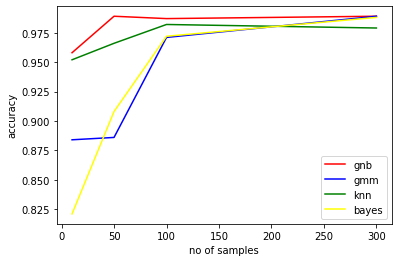

(1000, 21)
length neg
500
[1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1,

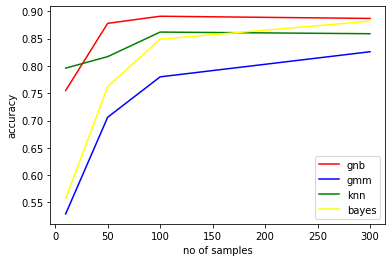

(1000, 21)
length neg
500
[-1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1,

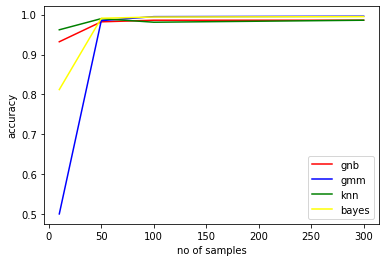

In [0]:
def bayes_class(n):
    t_d,matrix_test=taking_data(n)
    print(t_d.shape)
    result=[]
    result2=[]
    result3=[]
    result4=[]
    result5=[]
    s=[10,50,100,300]
    for i in s:
        num=random_gen(i)
        train_data=gen_train_data(num,t_d)
        #print(train_data)
        #train_data=matrix[:i,:]
       
        train_data=np.array(train_data)
        #print(train_data)
        #print(train_data.shape)
        gnb = GaussianNB()
        gmm=GaussianMixture(n_components=2)
        knn=kn(n_neighbors=5)
       # print(train_data)
        y_pred = gnb.fit(train_data[:,:20],train_data[:,20]).predict(matrix_test[:,:20])
        y_pred1=gmm.fit(train_data[:,:20]).predict(matrix_test[:,:20])
        y_pred2=knn.fit(train_data[:,:20],train_data[:,20]).predict(matrix_test[:,:20])
        y_pred4=bayes_classifier(train_data,matrix_test)
        print(y_pred4)
        for i in range(len(y_pred1)):
            if y_pred1[i]==0:
                y_pred1[i]=-1.0
            else:
                y_pred1[i]=1.0
        z=find_accuracy(y_pred1,matrix_test[:,20])
        print(z)
        if z>.5 :
          result2.append(z)
        else:
          result2.append(1-z)
        result.append(find_accuracy(y_pred,matrix_test[:,20]))
        result3.append(find_accuracy(y_pred2,matrix_test[:,20]))
        result4.append(find_accuracy(y_pred4,matrix_test[:,20]))
        #result2.append(find_accuracy(y_pred1,matrix_test[:,20]))
        #print((matrix_test[:,2] != y_pred).sum())
    #print(result)
        # print("gnb theta")
        # print(gnb.theta_)
        # print("gnb sigma")
        # print(gnb.sigma_)
        # print("gmm means")
        # print(gmm.means_)
        # print("gmm covariances")
        # print(gmm.covariances_)
    plt.xlabel('no of samples')
    plt.ylabel('accuracy')
    plt.plot(s,result,color='red')
    plt.plot(s,result2,color='blue')
    plt.plot(s,result3,color='green')
    plt.plot(s,result4,color='yellow')
    plt.legend(['gnb','gmm','knn','bayes'])
    plt.show()
for i in range(1,4):
  bayes_class(i)